In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## synthetic dataset

In [2]:
from sklearn.datasets import make_classification


In [3]:
X,y = make_classification(
    n_features=10,
    n_samples = 1000,
    n_informative=4,
    n_redundant=6,
    n_repeated=0,
    n_classes=2,
    random_state=42)

## train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## logistic regrssion

In [5]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import classification_report
y_pred_log = model_log.predict(X_test)
report = classification_report(y_test,y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



### here we see the recall is low but for a pneumoia model the recall must be high so we want to reduce the threshold

In [7]:
model_log.predict_proba(X_test)[:10]

array([[0.42179795, 0.57820205],
       [0.47266059, 0.52733941],
       [0.47451991, 0.52548009],
       [0.57633723, 0.42366277],
       [0.86157253, 0.13842747],
       [0.87685435, 0.12314565],
       [0.5311736 , 0.4688264 ],
       [0.24056062, 0.75943938],
       [0.93745725, 0.06254275],
       [0.6413146 , 0.3586854 ]])

In [8]:
probabilities = model_log.predict_proba(X_test)[:,1]
probabilities[:10]

array([0.57820205, 0.52733941, 0.52548009, 0.42366277, 0.13842747,
       0.12314565, 0.4688264 , 0.75943938, 0.06254275, 0.3586854 ])

In [9]:
len(probabilities)

250

In [10]:
(probabilities > 0.4)

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False,

In [11]:
y_pred_prob = (probabilities > 0.4).astype(int)
y_pred_prob

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1])

In [12]:
len(y_pred_prob)

250

In [13]:
report = classification_report(y_test,y_pred_prob)
print(report) 

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



## now we are using roc curve to find the correct threshold

In [14]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,probabilities)
fpr[:5],tpr[:5],threshold[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([1.97927769, 0.97927769, 0.80889618, 0.80837543, 0.80205328]))

In [15]:
desired_recall = 0.9
closed_index = np.argmin(abs(tpr - desired_recall))
closed_index

76

In [16]:
abs(tpr - desired_recall)

array([0.9      , 0.8921875, 0.634375 , 0.634375 , 0.6109375, 0.6109375,
       0.603125 , 0.603125 , 0.55625  , 0.55625  , 0.5484375, 0.5484375,
       0.525    , 0.525    , 0.5015625, 0.5015625, 0.4703125, 0.4703125,
       0.4625   , 0.4625   , 0.4390625, 0.4390625, 0.43125  , 0.43125  ,
       0.4234375, 0.4234375, 0.415625 , 0.415625 , 0.4078125, 0.4078125,
       0.3921875, 0.3921875, 0.384375 , 0.384375 , 0.3609375, 0.3609375,
       0.3453125, 0.3453125, 0.3140625, 0.3140625, 0.275    , 0.275    ,
       0.259375 , 0.259375 , 0.2515625, 0.2515625, 0.24375  , 0.24375  ,
       0.18125  , 0.18125  , 0.15     , 0.15     , 0.1421875, 0.1421875,
       0.134375 , 0.134375 , 0.1265625, 0.1265625, 0.1109375, 0.1109375,
       0.103125 , 0.103125 , 0.05625  , 0.05625  , 0.0484375, 0.0484375,
       0.040625 , 0.040625 , 0.0328125, 0.0328125, 0.025    , 0.025    ,
       0.0171875, 0.0171875, 0.009375 , 0.009375 , 0.00625  , 0.00625  ,
       0.0140625, 0.0140625, 0.021875 , 0.021875 , 

In [17]:
threshold[closed_index], tpr[closed_index],fpr[closed_index]

(0.2634933759430514, 0.90625, 0.7049180327868853)

### here when the threshold is reduced to 0.26 we get 90% correct predictions that are real world correct and 70% are not have diease but predicted as disease

In [18]:
y_pred_low = (probabilities > 0.2634933759430514).astype(int)
report = classification_report(y_test,y_pred_low)
print(report) 

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [19]:
from sklearn.metrics import auc
area_1 = auc(fpr,tpr)
area_1

0.764856557377049

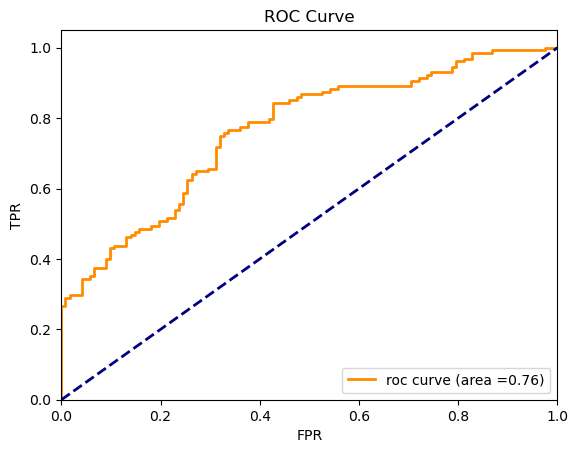

In [20]:
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=2,label="roc curve (area =%0.2f)" %area_1)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

## Xgboost

In [21]:
from xgboost import XGBClassifier
model_x = XGBClassifier()
model_x.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred_x = model_x.predict(X_test)
report = classification_report(y_test,y_pred_x)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [23]:
probabilities_x = model_x.predict_proba(X_test)[:,1]
fpr_x,tpr_x,threshold_x = roc_curve(y_test,probabilities_x)
threshold_x[:5],tpr_x[:5],fpr_x[:5]

(array([1.9999638 , 0.99996376, 0.99989676, 0.999892  , 0.9997204 ],
       dtype=float32),
 array([0.       , 0.0078125, 0.09375  , 0.09375  , 0.203125 ]),
 array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]))

In [24]:
area_2 = auc(fpr_x,tpr_x)
area_2

0.946016905737705

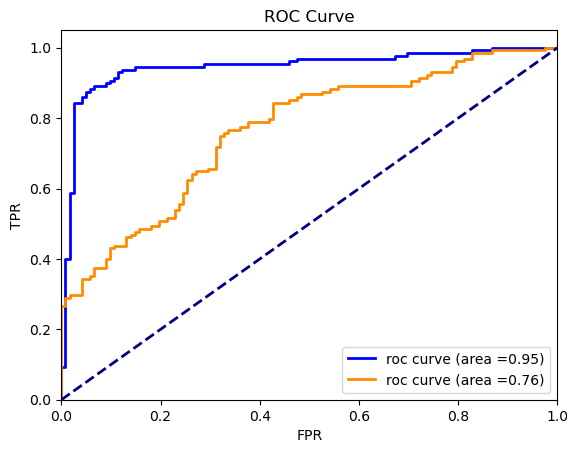

In [25]:
plt.figure()
plt.plot(fpr_x,tpr_x,color="blue",lw=2,label="roc curve (area =%0.2f)" %area_2)
plt.plot(fpr,tpr,color="darkorange",lw=2,label="roc curve (area =%0.2f)" %area_1)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

In [33]:
desired_recall =0.92
closed_index = np.argmin(abs(tpr_x - desired_recall))
threshold_x[closed_index],fpr_x[closed_index],tpr_x[closed_index]

(0.30599606, 0.10655737704918032, 0.9140625)

### we can see the fpr is 0.10 for the threshold 0.3

In [27]:
prob_x_parm = model_x.predict_proba(X_test)[:,1]
prob_x_parm[:10]

array([1.0957113e-02, 9.7949392e-01, 9.8918438e-01, 2.2574008e-01,
       3.7394656e-04, 6.0945161e-04, 3.8605008e-02, 5.1964450e-01,
       1.7451313e-03, 1.9269834e-01], dtype=float32)

In [28]:
y_pred_x_parm = (prob_x_parm > 0.30599606).astype(int)

In [29]:
report = classification_report(y_test,y_pred_x_parm)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       122
           1       0.90      0.91      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [42]:

fpr_abi,tpr_abi,threshold_abi=roc_curve(y_test,y_pred_x_parm )

In [43]:
area_abi = auc(fpr_abi,tpr_abi)
area_abi

0.8998463114754098

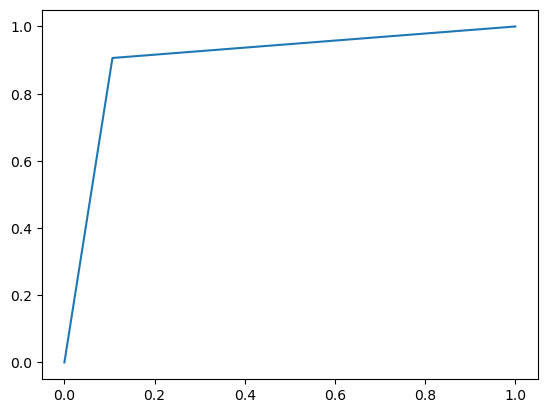

In [44]:
plt.plot(fpr_abi,tpr_abi)

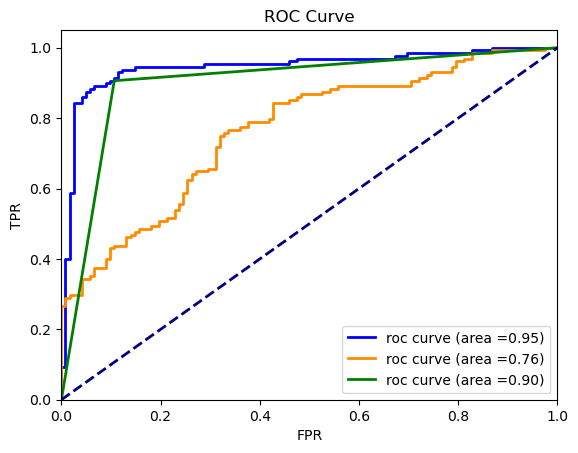

In [45]:
plt.figure()
plt.plot(fpr_x,tpr_x,color="blue",lw=2,label="roc curve (area =%0.2f)" %area_2)
plt.plot(fpr,tpr,color="darkorange",lw=2,label="roc curve (area =%0.2f)" %area_1)
plt.plot(fpr_abi,tpr_abi,color="green",lw=2,label="roc curve (area =%0.2f)" %area_abi)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()